# ***Engr.Muhammad Javed***

## **Max Voting (Classification):**

## *Importing Required Libraries*


In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.datasets import make_moons


## *Generating Synthetic Moon-Shaped Dataset for Clustering or Classification*


In [15]:
x , y = make_moons(n_samples=500 , noise=0.2)

In [16]:
data = {"x1" : x[: , 0] , "x2" : x[:,1] , "y" : y}
df = pd.DataFrame(data)


## *Show Dataset*


In [17]:
df

,x1,x2,y
0,0.805524,-0.503131,1
1,1.351927,-0.396748,1
2,-0.883801,0.938834,0
3,0.765149,-0.047425,1
4,1.831717,-0.096560,1
...,...,...,...
495,1.686287,-0.127348,1
496,0.728579,0.687895,0
497,1.044123,0.411448,0
498,0.718428,0.272691,0


In [18]:
df.columns

Index(['x1', 'x2', 'y'], dtype='object')

## *Visualizing Synthetic Dataset with Class Labels Using Scatter Plot*


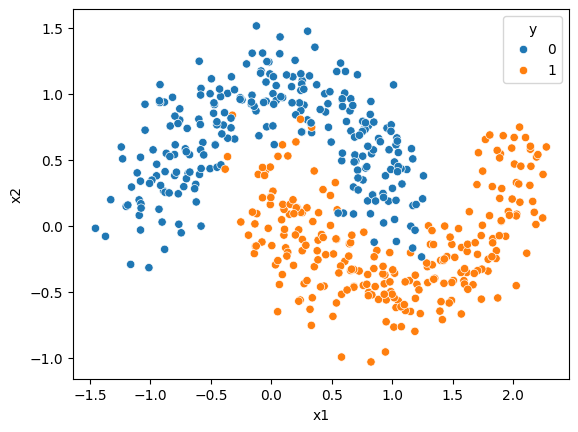

In [19]:
sn.scatterplot(x = "x1" , y = "x2" , data = df , hue = "y")
plt.show()


## *Splitting Features and target Variable*


In [20]:
xa = df[["x1" , "x2"]]
ya = df["y"]

## *Splitting Dataset into Training and Testing Sets*


In [21]:
X_train , X_test  , Y_train , Y_test = train_test_split(xa , ya , test_size=0.2 , random_state=42)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## *Training Decision Tree Classifier and Evaluating Accuracy*


In [27]:
dt = DecisionTreeClassifier()
dt.fit(X_train , Y_train)
print(dt.score(X_train , Y_train)*100)
print(dt.score(X_test , Y_test)*100)

100.0
95.0


## *Training Support Vector Classifier (SVC) and Evaluating Accuracy*


In [28]:
dS = SVC()
dS.fit(X_train , Y_train)
print(dS.score(X_train , Y_train)*100)
print(dS.score(X_test , Y_test)*100)

96.5
96.0


## *Training Gaussian Naive Bayes Classifier and Evaluating Accuracy*


In [29]:
gnb = GaussianNB()
gnb.fit(X_train , Y_train)
print(gnb.score(X_train , Y_train)*100)
print(gnb.score(X_test , Y_test)*100)

87.5
87.0


In [31]:
from sklearn.ensemble import VotingClassifier


## *Creating a List of Classifiers for Ensemble or Comparison*

In [32]:
li = [("dt1" , DecisionTreeClassifier()) , ("sv1" , SVC()) , ("gnb1" , GaussianNB())]


## *Training a Weighted Voting Classifier Ensemble*


In [35]:
VC = VotingClassifier(li , weights=[10 ,7 ,5])
VC.fit(X_train , Y_train)

,estimators,"[('dt1', ...), ('sv1', ...), ...]"
,voting,'hard'
,weights,"[10, 7, ...]"
,n_jobs,None
,flatten_transform,True
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


## *Evaluating Weighted Voting Classifier Accuracy on Training and Testing Data*


In [36]:
print(VC.score(X_train , Y_train)*100)
print(VC.score(X_test , Y_test)*100)

96.5
96.0


In [37]:
prd = {"dt_pred" : dt.predict(X_test) , "svm_pred" : dS.predict(X_test) , "gnb_pred" : gnb.predict(X_test) , "vc_pred" : VC.predict(X_test) , "actual" : Y_test}

In [39]:
data = pd.DataFrame(prd)
data

,dt_pred,svm_pred,gnb_pred,vc_pred,actual
361,1,1,1,1,1
73,0,0,0,0,0
374,0,0,0,0,0
155,0,0,0,0,0
104,0,0,0,0,0
...,...,...,...,...,...
347,1,1,1,1,1
86,0,0,0,0,0
75,0,0,0,0,0
438,1,1,1,1,1
